In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

In [3]:
tf.__version__

'2.0.0'

In [4]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
def compare_model_label(model, inputs, ab):
    plt.figure(figsize=(10, 30))
    l = inputs[0]

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    try:
        plt.subplot(1,3,3)
        print(l.shape, inputs[1].shape)
        output = model.predict( [ np.expand_dims(l, axis=0), np.expand_dims(inputs[1], axis=0) ] )
    except:
        pass

    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

# Training

In [ ]:
from src.model.train_model import train_model
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c
model = train_model()

In [6]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [7]:
%load_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 23225), started 2:14:50 ago. (Use '!kill 23225' to kill it.)

In [9]:
# Save the model
MODEL_NAME = f'{c.TRAIN_SIZE}_images_trimmed_koalarization.h5'
SAVE_MODEL_PATH = f'{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_{MODEL_NAME}'
MODEL_PATH = f'models'

In [ ]:
model.save(f'{MODEL_PATH}/{SAVE_MODEL_PATH}')

In [10]:
# Recreate the exact same model purely from the file
model = tf.keras.models.load_model(f'{MODEL_PATH}/{MODEL_NAME}')

In [11]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 18s 4s/step - loss: 0.0121 - accuracy: 0.3717


[0.012120102159678936, 0.37174988]

## Images from Train set

(256, 256, 1) (1000,)


/home/yimejky/neural-networks/venv/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 83 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


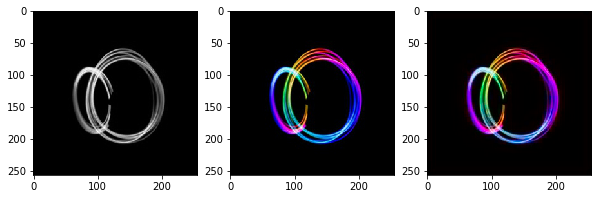

(256, 256, 1) (1000,)


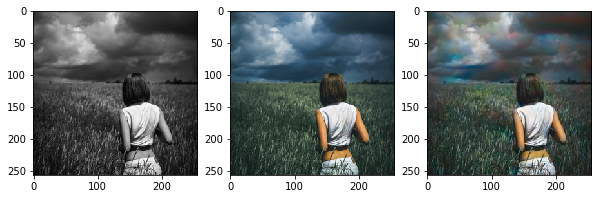

(256, 256, 1) (1000,)


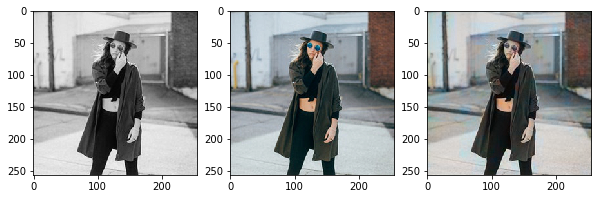

(256, 256, 1) (1000,)


/home/yimejky/neural-networks/venv/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


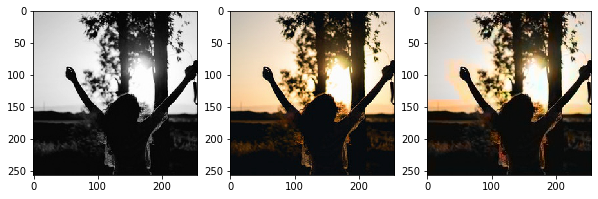

(256, 256, 1) (1000,)


/home/yimejky/neural-networks/venv/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


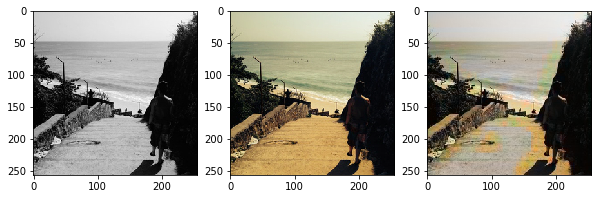

(256, 256, 1) (1000,)


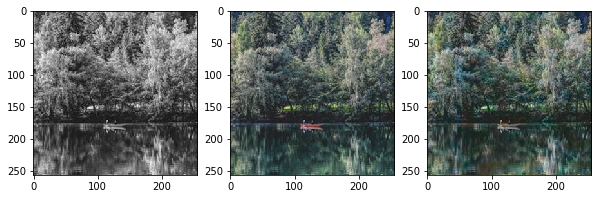

(256, 256, 1) (1000,)


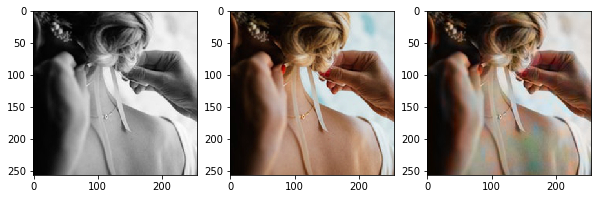

(256, 256, 1) (1000,)


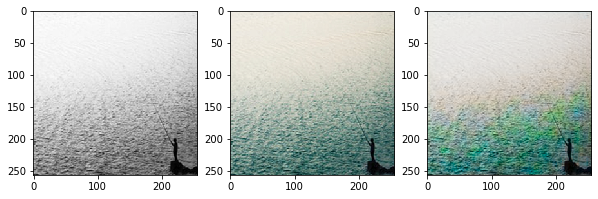

(256, 256, 1) (1000,)


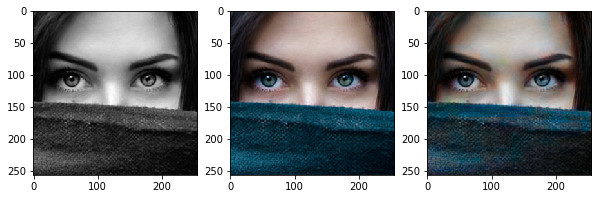

(256, 256, 1) (1000,)


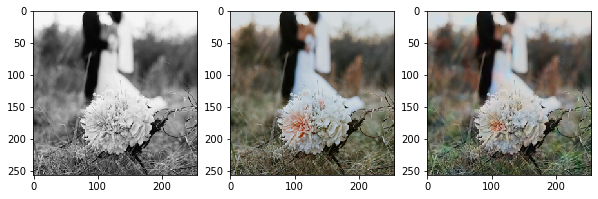

(256, 256, 1) (1000,)


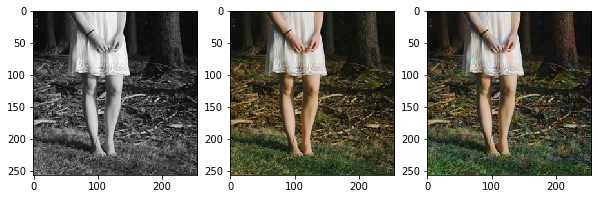

(256, 256, 1) (1000,)


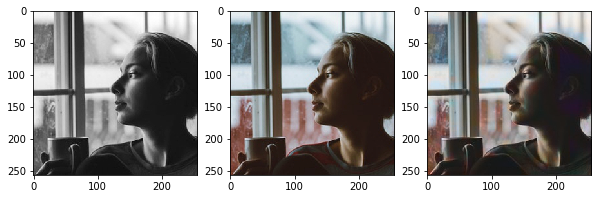

(256, 256, 1) (1000,)


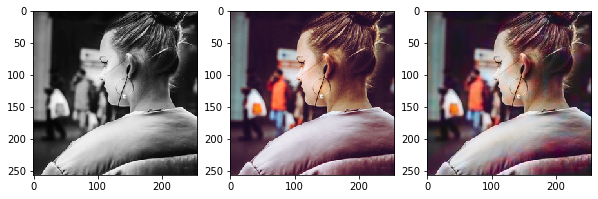

(256, 256, 1) (1000,)


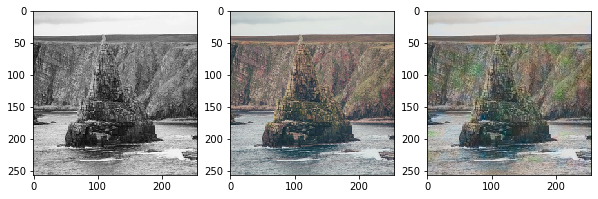

(256, 256, 1) (1000,)


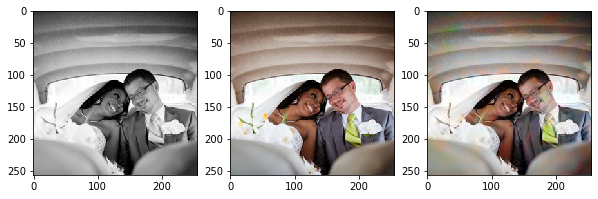

(256, 256, 1) (1000,)


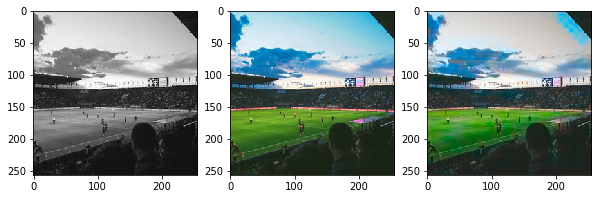

(256, 256, 1) (1000,)


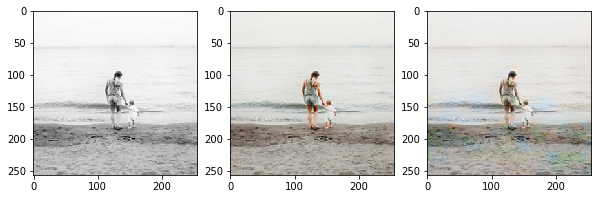

(256, 256, 1) (1000,)


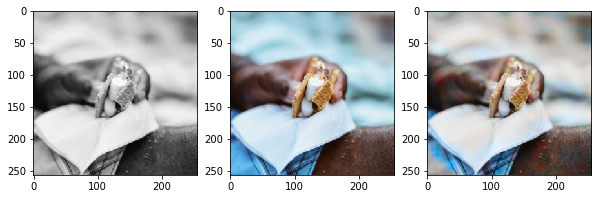

(256, 256, 1) (1000,)


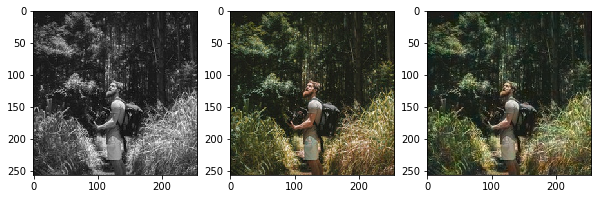

(256, 256, 1) (1000,)


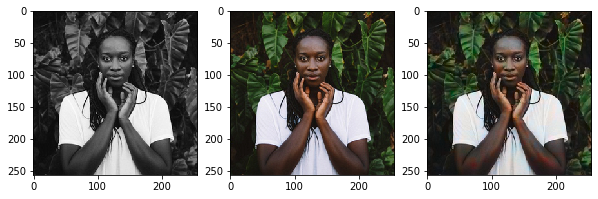

In [12]:
train_gen = image_generator(train_paths)
for i in range(20):
    inputs, ab = next(train_gen)
    compare_model_label(model, inputs, ab)

## Images from Test set

In [13]:
test_gen = image_generator(test_paths)

(256, 256, 1) (1000,)


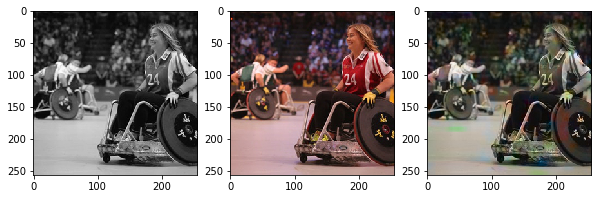

(256, 256, 1) (1000,)


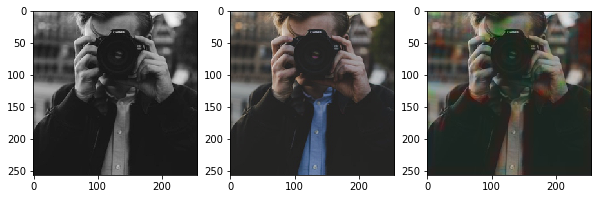

(256, 256, 1) (1000,)


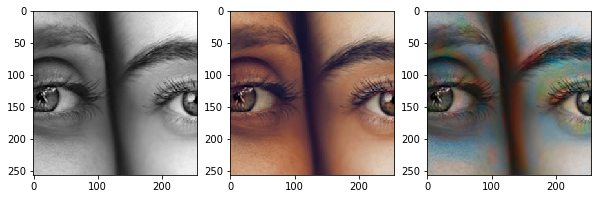

(256, 256, 1) (1000,)


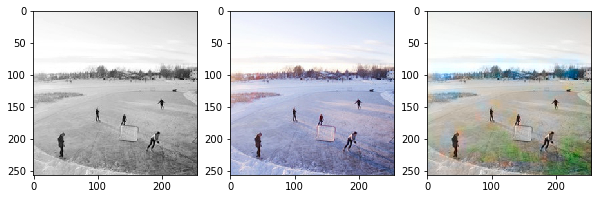

(256, 256, 1) (1000,)


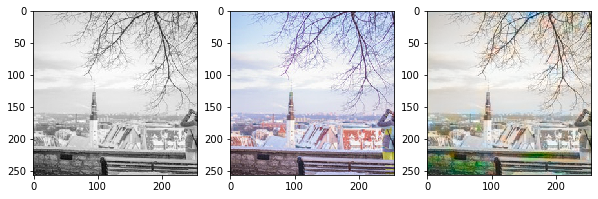

In [14]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)